In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# make 100 measurements in the interval
truth = np.linspace(-59.2,59.2,200)
zeros = np.zeros_like(truth)
error_axis = np.linspace(-3,3,200)
measurments = np.random.normal(truth,0.5)

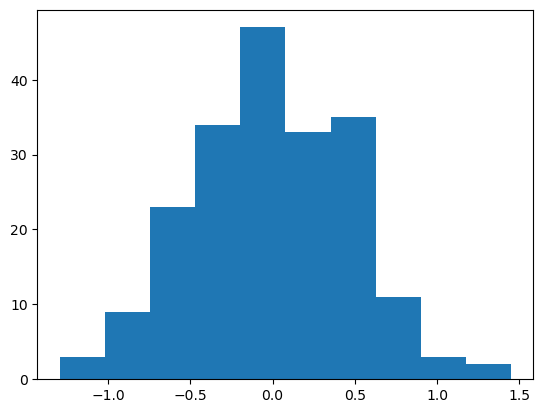

TypeError: rv_frozen.cdf() takes 2 positional arguments but 3 were given

In [4]:
deviation = measurments - truth
std = np.std(deviation)
mean = np.mean(deviation)
plt.hist(deviation)
plt.show()

#calculate the probability of finding measurements within the accuracy limit
p_val = stats.norm(mean, std).cdf(1,-1)
plt.plot(np.random.normal(zeros,std),p_val)
plt.show()
plt.hist(np.random.normal(zeros,std))
plt.show()

In [3]:
std

0.29676506073166764